In [14]:
import pandas as pd
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt

[-0.68931596 -0.76730171 -0.7518593 ]
[0.7313124  0.74499404 0.73909969]
[-0.01069751  0.00061867  0.01360504]


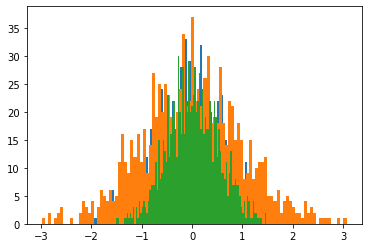

In [101]:
# Creating our own data set
mean = 0,
std_dev = 0.25
x = np.random.normal(mean, std_dev, size=(1000, 3))

print(np.min(x, axis = 0))
print(np.max(x, axis = 0))
print(np.mean(x, axis = 0))

plt.show()

coeff = np.array([3,-4,2])

x = x*coeff
y = np.sum(x,axis = 1) + np.random.random((1000,))

_ = plt.hist(x[:,0], bins = 100)
_ = plt.hist(x[:,1], bins = 100)
_ = plt.hist(x[:,2], bins = 100)
# all three parameters follow a nomal distribution

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [103]:
sc = StandardScaler()
X = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

### For cost function derivation and gradient descent function

http://mccormickml.com/2014/03/04/gradient-descent-derivation/

In [105]:
def cost_function(X, y, w, b):
    """
    X: input features - independent variables
    y: dependent variable
    w: weights for the independent variable - coeffients
    b: bias
    """
    
#     cost = np.divide(np.sum(np.power(np.subtract((X.dot(w) + b),y),2)), 2*y.shape[0])
    cost = (((X.dot(w)+b)-y)**2).sum() / (2*y.shape[0]) # this has lower execution time
    
    return cost

In [137]:
# %%timeit
# np.divide(np.sum(np.power(np.subtract(x.dot(coeff),y),2)),(2*y.shape[0]))

15.7 µs ± 40.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [138]:
# %%timeit
# (((x.dot(coeff))-y)**2).sum() / (2*y.shape[0])

5.94 µs ± 48.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [139]:
# print(np.divide(np.sum(np.power(np.subtract(x.dot(coeff),y),2)),(2*y.shape[0])))
# print((((x.dot(coeff))-y)**2).sum() / (2*y.shape[0]))

13.602221341565794
13.602221341565794


### for graident descent:
https://medium.com/ai-techsystems/gradient-descent-in-less-than-500-words-5f81d0e63b6a

In [109]:
def gradient_descent(X, y, alpha = 0.01, epochs = 1000):
    """
    X: input features - independent variables
    y: dependent variable
    alpha: learning rate
    epochs: number of iterations
    """
    np.random.seed(0)
    w = np.random.randn(X.shape[1])
    print(w)
    b = 0
    
    m = y.shape[0]
    costs = [0]*epochs
    
    for epoch in range(epochs):
#         print("epoch: ",epoch)
        
        h_theta = X.dot(w)+b
        loss = h_theta - y

        w = w - alpha * (X.T.dot(loss)/m)
        b = b - alpha * (loss.sum()/m)
        
        cost = cost_function(X,y,w,b)
        costs[epoch] = cost
#         print(cost)
        
    return w, b, costs

In [110]:
w, b, costs = gradient_descent(X_train, y_train, alpha=0.001, epochs = 3000)

[1.76405235 0.40015721 0.97873798]


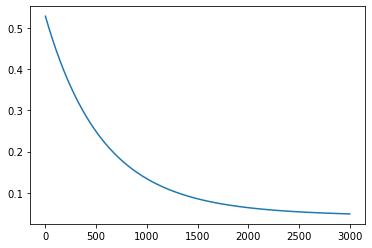

In [111]:
plt.plot(costs)
plt.show()

In [112]:
def predict(X,w,b):
    return X.dot(w)+b

In [113]:
y_pred = predict(X_test, w, b)

In [116]:
def r2(y_pred, y, k):

    rss = ((y_pred - y) ** 2).sum()
    tss = ((y-y.mean()) ** 2).sum()
    
    r2 = 1 - (rss / tss)
    adj_r2 = 1 - (((1-r2)*(y.shape[0]-1))/(y.shape[0]-k-1))
    return r2, adj_r2

In [118]:
r2(y_pred, y_test, k = X_test.shape[1])

(0.9521783899503815, 0.9514464265312547)

In [131]:
# Testing with sklearn library

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [132]:
sk_model = LinearRegression().fit(X_train, y_train)

sk_model

LinearRegression()

In [133]:
sk_model.coef_, sk_model.intercept_

(array([0.99951478, 0.99414425, 1.01008479]), 0.49514161588216576)

In [134]:
w, b

(array([1.13572532, 0.9704475 , 1.0163618 ]), 0.47970063258534007)

In [135]:
y_pred_sk = sk_model.predict(X_test)

In [136]:
r2(y_pred_sk, y_test, k = X_test.shape[1])

(0.9573021749993269, 0.9566486368615615)

### Referneces used:

1. http://mccormickml.com/2014/03/04/gradient-descent-derivation/
2. https://medium.com/ai-techsystems/gradient-descent-in-less-than-500-words-5f81d0e63b6a
3. https://medium.com/analytics-vidhya/how-to-implement-multiple-linear-regression-from-scratch-c7ea23304540
